In [2]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

## 데이터 이미지 확인


In [3]:
import numpy as np
from PIL import Image

from dataset.mnist import load_mnist


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


## 신경망 추론 처리

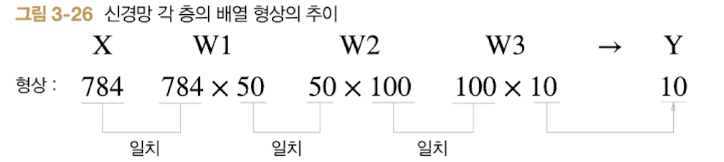


In [ ]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    # 미리 학습된 가중치 매개변수를 읽어온다.
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()  # 데이터를 가져온다.
network = init_network()  # 네트워크를 초기화한다.
accuracy_cnt = 0  # 맞힌 숫자를 센다.
for i in range(len(x)):  # 데이터의 개수만큼 반복한다.
    y = predict(network, x[i])  # 데이터를 넣어 결과를 얻는다.
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:  # 정답과 같으면
        accuracy_cnt += 1  # 정확도 카운트를 증가시킨다.

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 배치 처리 (여러개의 이미지를 한번에 처리)

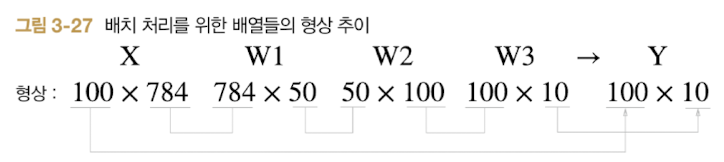


In [ ]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    # 미리 학습된 가중치 매개변수를 읽어온다.
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # 0부터 len(x)까지 batch_size 간격으로 증가
    x_batch = x[i : i + batch_size]  # x[i:i+batch_size]로 미니배치를 만든다.
    y_batch = predict(network, x_batch)  # predict()로 확률을 구한다.
    p = np.argmax(y_batch, axis=1)  # 확률이 가장 높은 원소의 인덱스를 구한다.
    accuracy_cnt += np.sum(p == t[i : i + batch_size])  # 정답과 일치하는 개수를 센다.

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
